In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv('student_exam_scores.csv')

In [2]:
df.sample(10)

,student_id,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
77,S078,6.0,6.8,84.8,75,40.3
57,S058,9.0,5.1,76.1,77,38.2
141,S142,7.0,5.1,98.2,88,43.3
199,S200,10.2,6.3,97.4,68,37.8
134,S135,1.9,8.4,85.0,59,30.6
127,S128,11.2,8.7,60.0,64,42.7
36,S037,10.1,8.5,62.5,69,44.7
66,S067,3.5,7.1,61.6,54,21.7
22,S023,4.7,6.7,59.7,59,29.6
197,S198,1.6,6.9,63.8,76,28.2


In [3]:
df.shape

(200, 6)

In [4]:
df.isnull().sum()

student_id            0
hours_studied         0
sleep_hours           0
attendance_percent    0
previous_scores       0
exam_score            0
dtype: int64

In [5]:
df[::].duplicated().sum()

np.int64(0)

In [6]:
df.describe()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,6.325500,6.622000,74.830000,66.800000,33.955000
std,3.227317,1.497138,14.249905,15.663869,6.789548
min,1.000000,4.000000,50.300000,40.000000,17.100000
25%,3.500000,5.300000,62.200000,54.000000,29.500000
50%,6.150000,6.700000,75.250000,67.500000,34.050000
75%,9.000000,8.025000,87.425000,80.000000,38.750000
max,12.000000,9.000000,100.000000,95.000000,51.300000


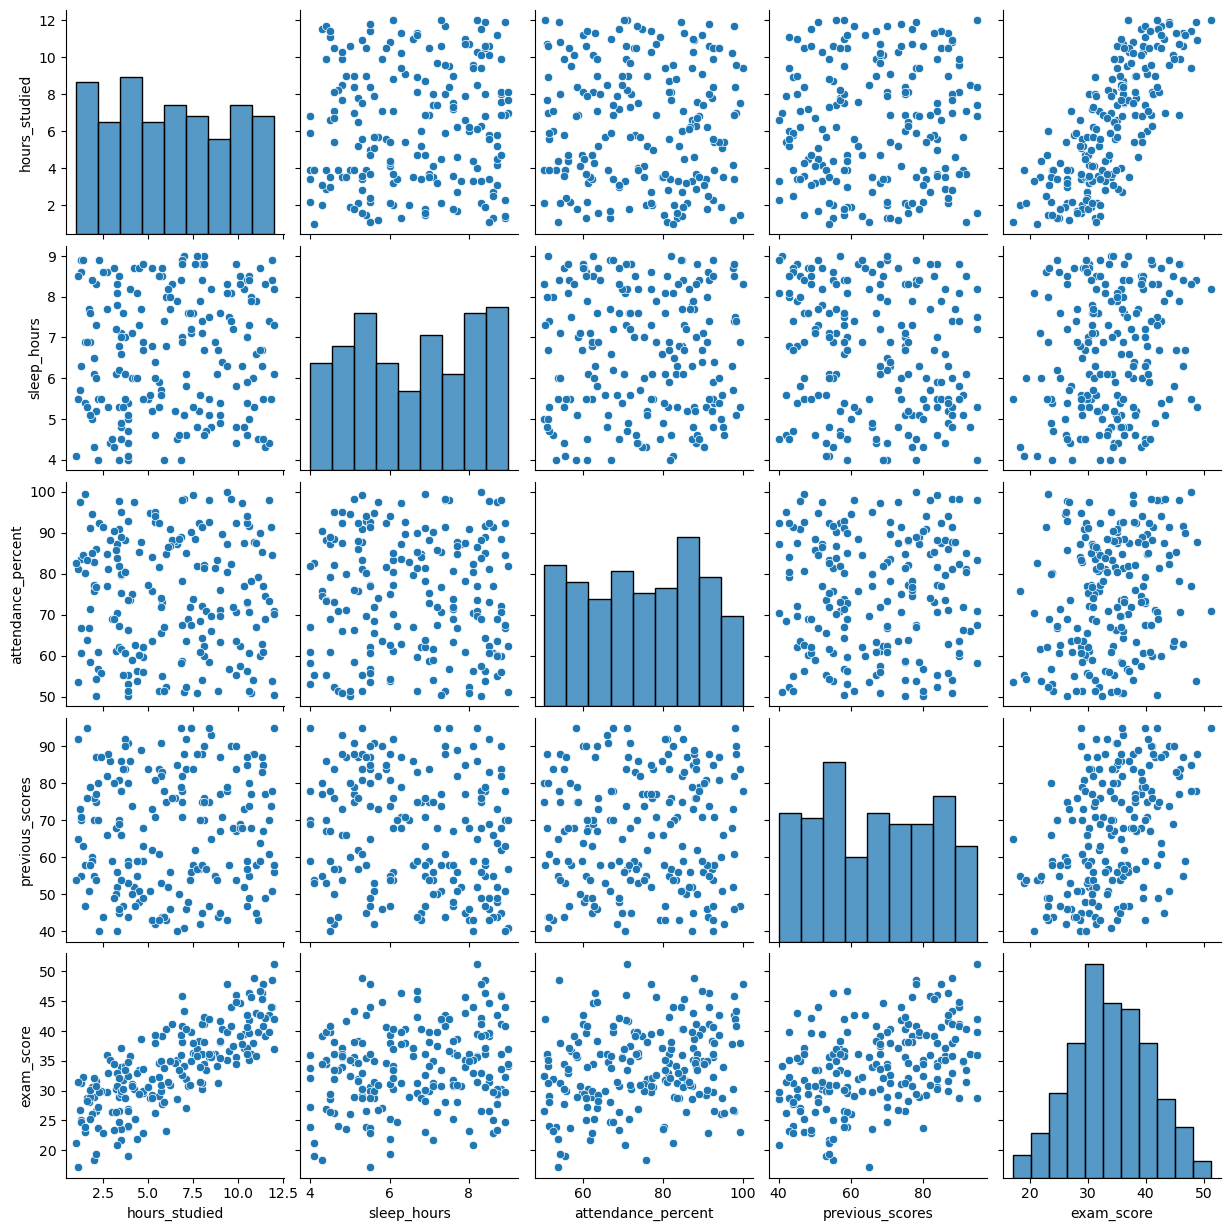

In [7]:
import seaborn as sns
sns.pairplot(df)

In [8]:
df.iloc[:,1:].corr()

,hours_studied,sleep_hours,attendance_percent,previous_scores,exam_score
hours_studied,1.000000,0.077864,-0.031311,0.069078,0.776751
sleep_hours,0.077864,1.000000,0.000572,-0.194251,0.188222
attendance_percent,-0.031311,0.000572,1.000000,0.051958,0.225713
previous_scores,0.069078,-0.194251,0.051958,1.000000,0.431105
exam_score,0.776751,0.188222,0.225713,0.431105,1.000000


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:5],df.iloc[:,-1], test_size=0.2, random_state=42)

# Applying Models

### Linear Regression Models

In [10]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [11]:
from sklearn.metrics import r2_score
r2_test = r2_score(y_test, y_pred)
r2_train = model.score(X_train,y_train)

In [12]:
print("R2 Score for training data: ",r2_train*100)
print("R2 Score for testing data: ",r2_test*100)

R2 Score for training data:  83.642950148381
R2 Score for testing data:  85.37447137159516


In [13]:
from sklearn.linear_model import Ridge
Ridge_model = Ridge()
Ridge_model.fit(X_train,y_train)
r2 = Ridge_model.score(X_train,y_train)
print("Training_Accuracy: ",r2*100)
pred3 = Ridge_model.predict(X_test)

Training_Accuracy:  83.64289877363255


In [14]:
from sklearn.metrics import r2_score
r2_tst = r2_score(y_test, pred3)
print("Testing_Accuracy: ",r2_tst*100)

Testing_Accuracy:  85.36616754127866


# Applying Lasso Model

In [15]:
from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train,y_train)
r2_tr = las.score(X_train,y_train)
r2_tr

0.8230990973147989

In [16]:
pred4 = las.predict(X_test)
from sklearn.metrics import r2_score

r2_tst = r2_score(y_test,pred4)
print("Testing_Accuracy: ",r2_tst*100)

Testing_Accuracy:  82.60736336507941


In [17]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet(alpha=0.1, l1_ratio=0.5)

elastic.fit(X_train, y_train)
print("Elastic Net Score:", elastic.score(X_test, y_test))
print("Elastic Net Coefficients:", elastic.coef_)

Elastic Net Score: 0.8523284412815624
Elastic Net Coefficients: [1.53841078 0.84016271 0.10877921 0.18193787]


In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
r2_tr = rf.score(X_train,y_train)
r2_tr

0.9631368098323511

In [20]:
pred6 = rf.predict(X_test)
from sklearn.metrics import r2_score

r2_test = r2_score(y_test,pred6)
print("Testing_Accuracy: ",r2_test)

Testing_Accuracy:  0.7922296358966725


# Final selection of best model

In [21]:
import pickle
filename='finalized_model.pkl'
with open(filename, 'wb') as file:
    pickle.dump(las, file)

In [22]:
filename='finalized_model.pkl'
with open(filename, 'rb') as file:
    loaded_model=pickle.load(file)